In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *

In [2]:
m = 1000
d = 100
q = 2
active = fourier

ratio_train = 0.7

In [3]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
y = (1+np.linalg.norm(X, axis=-1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
Ns = np.arange(1, 10101, 100)

In [7]:
results_dense = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense.append(res)

In [8]:
results_sparse = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, q, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse.append(res)

[0.022238969650409324, 0.025812500924540356, 0.03410753675101189, 0.060867293735826264, 0.06467202450543477, 0.040322061961474746, 0.03386374955406448, 0.031643563741610224, 0.029626292566319053, 0.028289891196974483, 0.027440850344642102, 0.026709877466402097, 0.0260194955057269, 0.026001530681899455, 0.02540618327783419, 0.025563708500685633, 0.025425228198405658, 0.024860210903879958, 0.02440936321278104, 0.025022865290881352, 0.024883362599199592, 0.024218268905362855, 0.02368285572916081, 0.024078157627711726, 0.024072318688375526, 0.024309137795936374, 0.023750460156674733, 0.02385654150783039, 0.023723942935727146, 0.023434348253331495, 0.02369545182476842, 0.023486217005957693, 0.023697198335210872, 0.023632883607823455, 0.023456159714758545, 0.023456369232513825, 0.023653275304806782, 0.02323404805954124, 0.0233661810287536, 0.022933448590634113, 0.023261447715806783, 0.023071013297234967, 0.023163969935933032, 0.023108784715589237, 0.023309018387103315, 0.023335466103783106, 

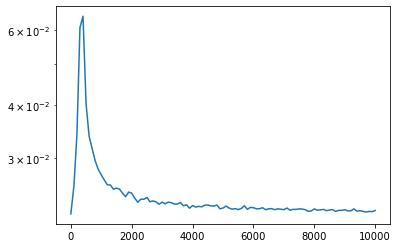

In [15]:
print([np.mean(res) for res in results_dense])
plt.semilogy(Ns, [np.mean(res) for res in results_dense])

[0.006644617970033818, 0.00036441677977342135, 0.00035954137121748205, 0.00048510618875411207, 0.0006406032203693563, 0.0003892575439159203, 0.0002941787524478862, 0.00024256533091904708, 0.00021524408670987012, 0.0002055811099339563, 0.00019321036617757557, 0.0001803293949150676, 0.00016850738896988807, 0.0001438562576385237, 0.0001522868127566178, 0.00014138176633643113, 0.00013554835143486727, 0.00013074878996510814, 0.000125021155101631, 0.0001262451124268407, 0.00011780858389441443, 0.00011836147494638754, 0.00011506672672078556, 0.00011080991712246924, 0.00010721938292510954, 0.00010696092942237819, 0.00010601949715490968, 0.00010337683841094575, 0.00010211775318804787, 0.0001030056351329744, 0.00010134714344910401, 9.612536322128681e-05, 9.782891378032398e-05, 9.238711380932948e-05, 9.355297157724543e-05, 8.831963088875322e-05, 8.502598667239992e-05, 9.151944817411249e-05, 8.734596090660599e-05, 9.044503465900592e-05, 8.584765925518124e-05, 8.372966357286092e-05, 8.5295528230617

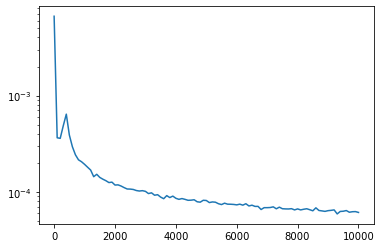

In [14]:
print([np.mean(res) for res in results_sparse])
plt.semilogy(Ns, [np.mean(res) for res in results_sparse])

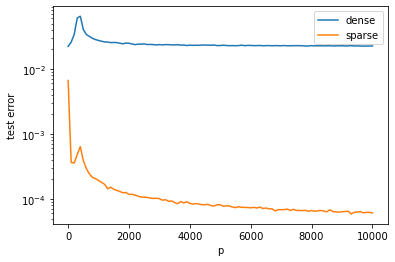

In [11]:
plt.semilogy(Ns, [np.mean(res) for res in results_dense], label="dense")
plt.semilogy(Ns, [np.mean(res) for res in results_sparse], label="sparse")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()